In [9]:
from llama_index.core import SimpleDirectoryReader
from llama_index.core.node_parser import (
    SentenceSplitter,
    SemanticSplitterNodeParser,
)
import os
from sentence_transformers import SentenceTransformer
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

In [6]:
FILEPATH = "./scrapers/out_text/AA2004-Accountants-Act-2004.txt"
documents = SimpleDirectoryReader(input_files=[FILEPATH]).load_data()

In [55]:
embed_model = HuggingFaceEmbedding(model_name="avsolatorio/GIST-small-Embedding-v0", embed_batch_size=100)

In [79]:
base_splitter = SentenceSplitter(chunk_size=128, chunk_overlap=32, separator=";")
splitter = SemanticSplitterNodeParser(
    buffer_size=4, 
    breakpoint_percentile_threshold=90, 
    embed_model=embed_model, 
    splitter=base_splitter,
    paragraph_separator="\n\n"
)
nodes = splitter.get_nodes_from_documents(documents)

In [82]:
model = SentenceTransformer("avsolatorio/GIST-small-Embedding-v0", revision=None)

In [87]:
len(nodes)

42

In [84]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

texts = [node.text for node in nodes]
embeddings = model.encode(texts, convert_to_numpy=True)

similarities = []
for i in range(len(texts) - 1):
    cos_sim = cosine_similarity([embeddings[i]], [embeddings[i+1]])[0][0]
    similarities.append(cos_sim)

# li = []
# for node in nodes:
#     li.append([len(node.text.split(" ")), len(node.text), node.text])
# df = pd.DataFrame(li)
# df

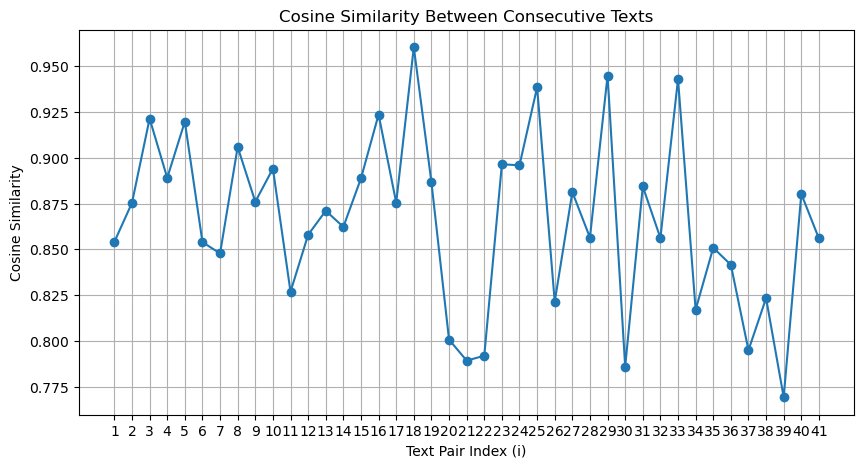

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(similarities) + 1), similarities, marker='o')
plt.title('Cosine Similarity Between Consecutive Texts')
plt.xlabel('Text Pair Index (i)')
plt.ylabel('Cosine Similarity')
plt.xticks(range(1, len(similarities) + 1))
plt.grid(True)
plt.show()

In [75]:
print(nodes[2].text)

“accounting limited liability partnership” or “accounting LLP” means a limited liability partnership approved as an accounting limited liability partnership under section 18A;


In [54]:
df.describe()

,0,1
count,163.000000,163.000000
mean,158.214724,1073.711656
std,191.276051,1309.122931
min,3.000000,33.000000
25%,42.500000,296.000000
50%,90.000000,603.000000
75%,194.000000,1258.000000
max,1087.000000,7589.000000


In [51]:
print(nodes[1].text)


This Act is the Accountants Act 2004.

Interpretation
2.—(1)  In this Act, unless the context otherwise requires —“accounting corporation” means a company approved as an accounting corporation under section 17;“accounting firm” means a firm approved as an accounting firm under section 18;“accounting limited liability partnership” or “accounting LLP” means a limited liability partnership approved as an accounting limited liability partnership under section 18A;“alternate address” means an alternate address maintained with the Registrar under section 12C that meets the requirements of that section;“Authority” means the Accounting and Corporate Regulatory Authority established under the Accounting and Corporate Regulatory Authority Act 2004;“Chairperson” means the Chairperson of the Oversight Committee;“company” has the meaning given by the Companies Act 1967;“Complaints and Disciplinary Panel” means the Complaints and Disciplinary Panel appointed under section 39;“Complaints Committee” m